In [12]:
# Import pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load Dataset

In [18]:
df_raw = pd.read_csv("./prosperLoanData.csv/prosperLoanData.csv")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df_raw.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

#### Missing values

Text(0.5, 1.0, 'Missing Values')

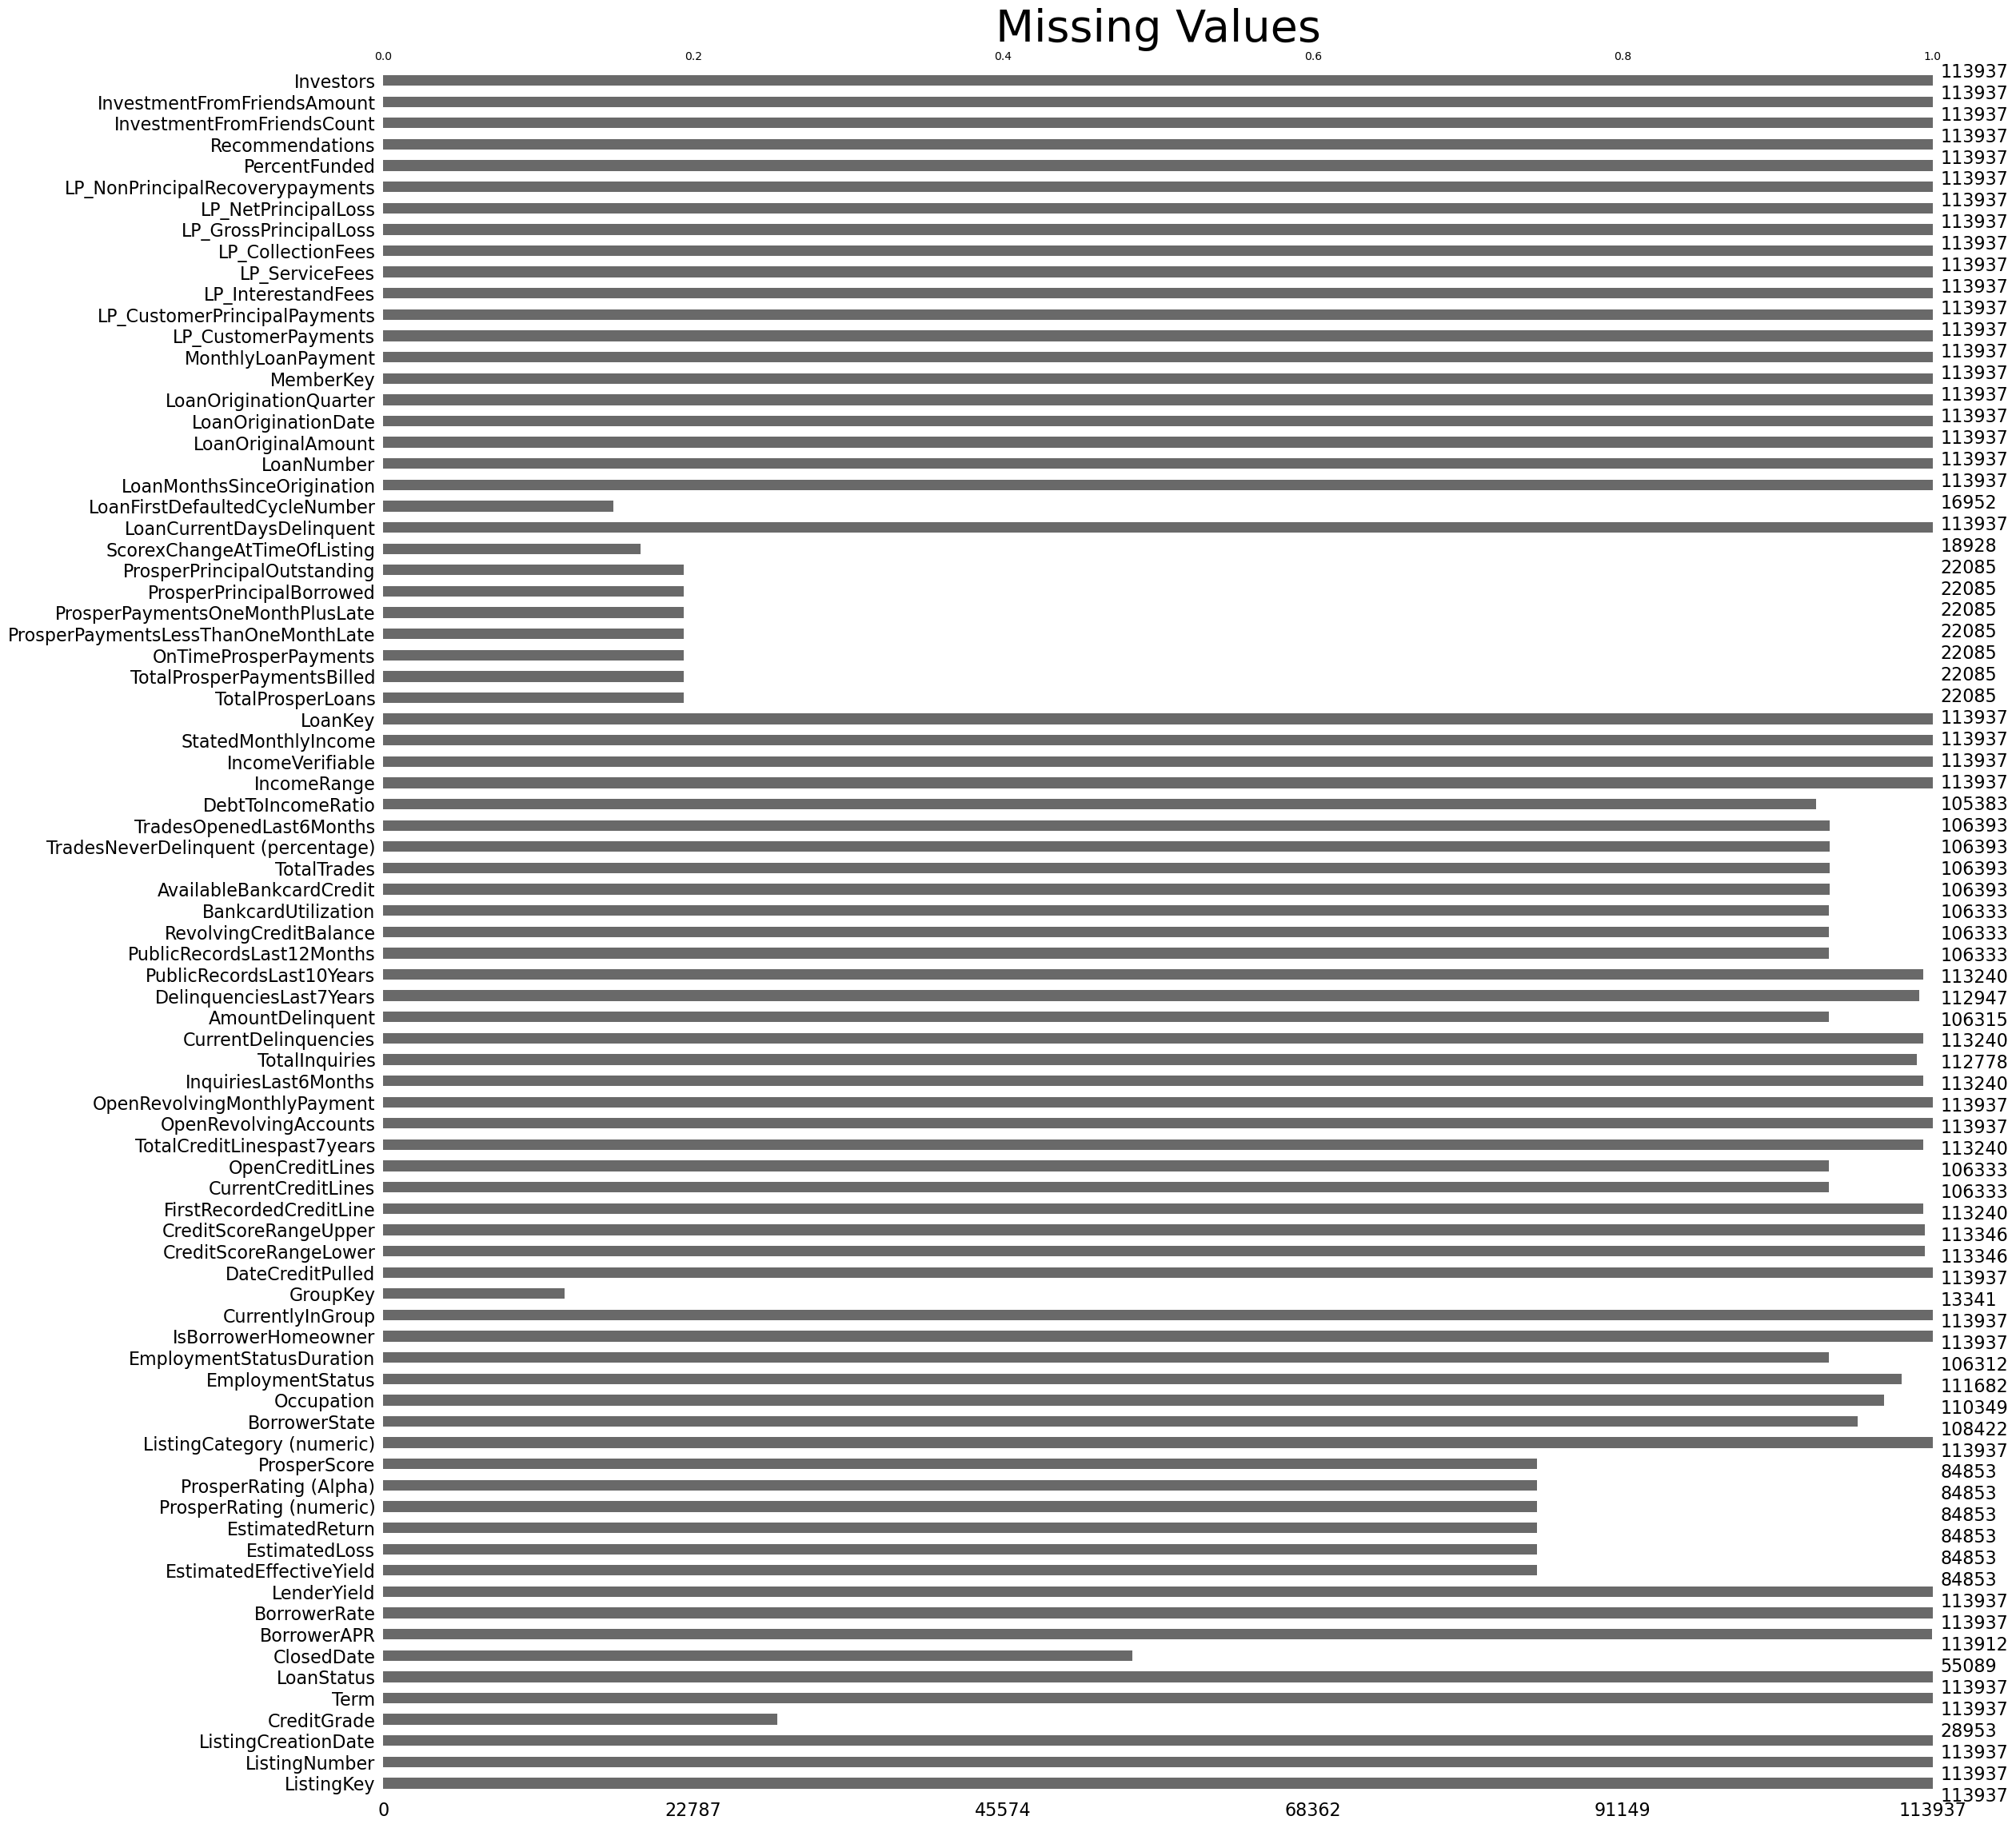

In [ ]:
msno.bar(df_raw) 
plt.title("Missing Values", fontsize = 40)

In [61]:
# Drop columns with more than 50% missing values (The length of graph is shorter than 0.5)
df = df_raw.copy()
df.drop(columns=["GroupKey",
    "LoanFirstDefaultedCycleNumber",
    "ScorexChangeAtTimeOfListing",
    "ProsperPrincipalOutstanding",
    "ProsperPrincipalBorrowed",
    "ProsperPaymentsOneMonthPlusLate",
    "ProsperPaymentsLessThanOneMonthLate",
    "OnTimeProsperPayments",
    "TotalProsperLoans",
    "TotalProsperPaymentsBilled",
    "CreditGrade"], inplace = True)  

df.info() # 81 -> 69      

# CreditGrade : This variable is considered important for default prediction according to prior research; 
# However, it is missing for all loans originated after 2009, so it cannot be used in the analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   ClosedDate                          55089 non-null   object 
 6   BorrowerAPR                         113912 non-null  float64
 7   BorrowerRate                        113937 non-null  float64
 8   LenderYield                         113937 non-null  float64
 9   EstimatedEffectiveYield             84853 non-null   float64
 10  EstimatedLoss                       84853 non-null   float64
 11  EstimatedReturn           

#### Check the dupulicates

In [62]:
# There are no duplicated rows.
df.drop_duplicates().shape

(113937, 70)

#### Conditional filtering according to the column definition
###### ProsperScore 전처리 고민중

In [63]:
# 1. ProsperScore range : 1~10
# Drop the rows which ProsperScore is over 10 (1456 rows were removed)
df.drop(df[df['ProsperScore'] > 10].index, inplace=True)

# Structural Missingness -> remove it only can see after 2009 / if not 
len(df[df['ProsperScore'].isna()]) # 29084

29084

In [64]:
# 2. ProsperRating (numeric) : 0 ~ 7
df['ProsperRating (numeric)'].unique()

array([nan,  6.,  3.,  5.,  2.,  4.,  7.,  1.])

###### 여기도 0 이 될 수 없다면?

In [65]:
# 3. Check the interest rate is 0 and over 0 & BorroerAPR < BorrowerRate
len(df[df['BorrowerRate'] < 0]), len(df[df['BorrowerAPR']< 0]), len(df[df['BorrowerAPR'] < df['BorrowerRate']])


(0, 0, 0)

In [66]:
# 4. Check the 'DebtToIncomeRatio'
# The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. 
# This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

len(df[df['DebtToIncomeRatio']>10.1])

0

Text(0.5, 1.0, 'Active loans')

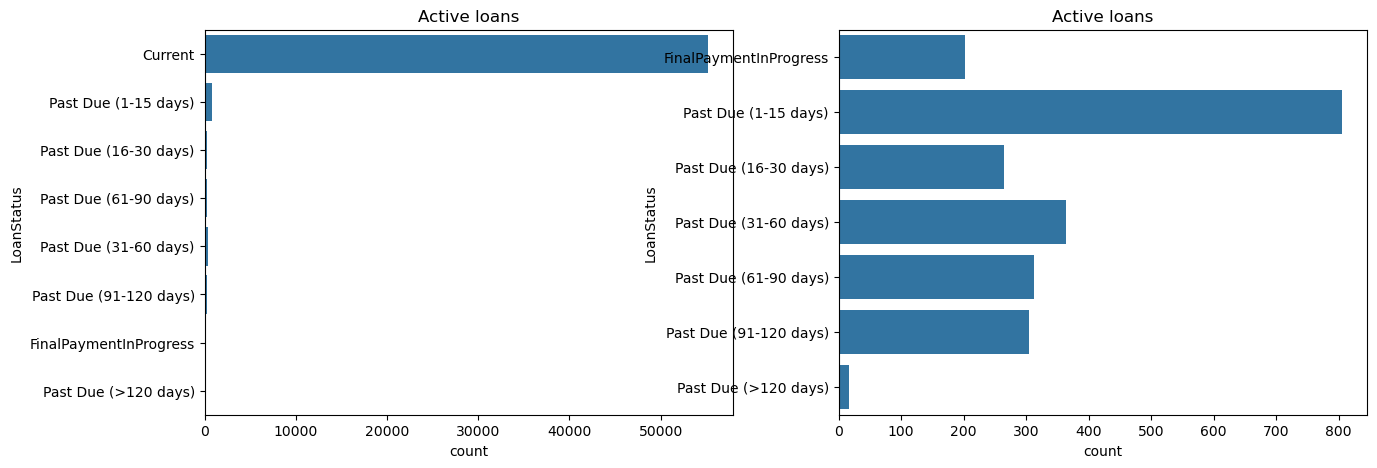

In [67]:
# 5. Check the Consistency check
df.loc[df['ClosedDate'].isnull(), 'LoanStatusActive'] = 1.  # Rogitic regresion(확률 모델링) & random forest(규칙발견) 
df.loc[df['ClosedDate'].notnull(), 'LoanStatusActive'] = 0
df['LoanStatusActive'] = df['LoanStatusActive'].astype('bool')

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

base_color = sns.color_palette()[0]

sns.countplot(data = df[df['LoanStatusActive']== 1], y = 'LoanStatus', color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Active loans')

plt.subplot(1,2,2)
order = ['FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', \
         'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
sns.countplot(data = df[df['LoanStatus'].isin(order)], y = 'LoanStatus', order = order, color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Active loans')

Text(0.5, 1.0, 'Non-Active loans(Completed exclueded)')

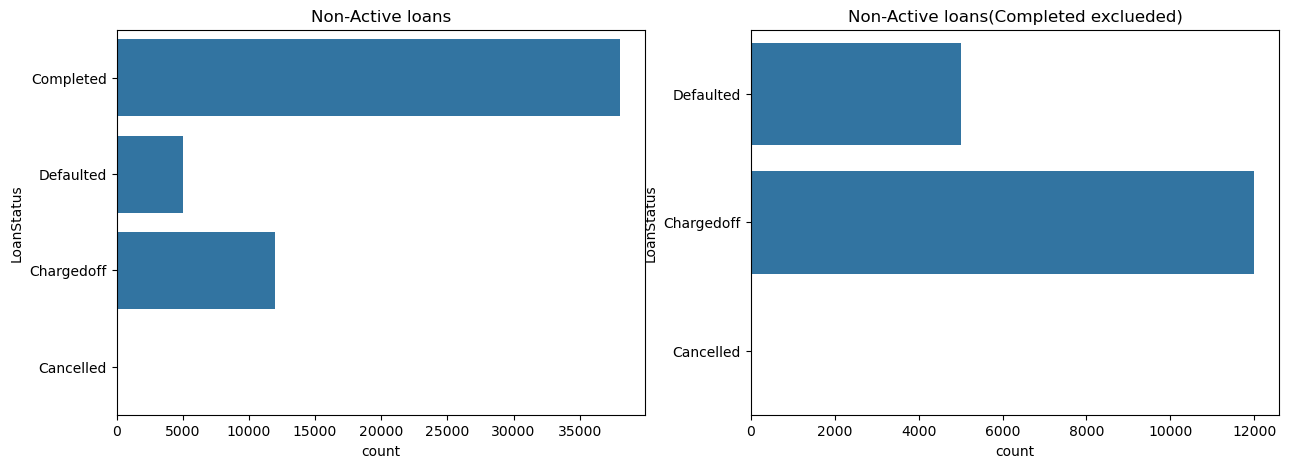

In [68]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)

sns.countplot(data = df[df.LoanStatusActive == 0], y = 'LoanStatus', color = base_color)
plt.xticks(rotation = 0)
plt.title('Non-Active loans')


plt.subplot(1,2,2)
sns.countplot(data = df[df.LoanStatus.isin(['Defaulted', 'Chargedoff', 'Cancelled'])], y = 'LoanStatus', color = base_color)
plt.xticks(rotation = 0)
plt.title('Non-Active loans(Completed exclueded)')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112481 entries, 0 to 113936
Data columns (total 71 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          112481 non-null  object 
 1   ListingNumber                       112481 non-null  int64  
 2   ListingCreationDate                 112481 non-null  object 
 3   Term                                112481 non-null  int64  
 4   LoanStatus                          112481 non-null  object 
 5   ClosedDate                          55057 non-null   object 
 6   BorrowerAPR                         112456 non-null  float64
 7   BorrowerRate                        112481 non-null  float64
 8   LenderYield                         112481 non-null  float64
 9   EstimatedEffectiveYield             83397 non-null   float64
 10  EstimatedLoss                       83397 non-null   float64
 11  EstimatedReturn                

#### Initial feature selection

In [ ]:
df.drop(columns = 
         ['ListingKey',  # ID variable
          'ListingNumber',  # Numeric ID variable
          'ListingCreationDate', "ClosedDate",
          'BorrowerState', 'Occupation', 'EmploymentStatus', 
          'DateCreditPulled', 
          'FirstRecordedCreditLine', 
          'LoanKey', 'LoanNumber', # ID variable
          'LoanOriginationDate', 'LoanOriginationQuarter', \
          'MemberKey', 'ListingCategory (numeric)',
          'CurrentlyInGroup',
          'ProsperRating (Alpha)','ProsperRating (numeric)' # There is a similar columns, ProsperScore
          ], 
          inplace = True)

# Drop estimated value
df.drop(columns = ["EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn"], inplace = True)

# Later comback
# later : LenderYield, ProsperScore, EmploymentStatusDuration,
# InquiriesLast6Months, TotalInquiries, PublicRecordsLast10Years, PublicRecordsLast12Months, IncomeVerifiable

### Trade information 
# TotalCreditLinespast7years, /CurrentDelinquencie,  AmountDelinquent, DelinquenciesLast7Years, / → all credit 다 가능함!
# TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, LoanCurrentDaysDelinquent(only 연체, chared off 이런것만 만 해당, 아니 이게 잇으면 무조건 부도 예측의 직방인디..)

### Inverstor 
# PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors

In [72]:
df1 = df[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'ProsperScore', \
           'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance', 'BankcardUtilization', 'DebtToIncomeRatio', 'AvailableBankcardCredit',
            'IncomeRange', 'StatedMonthlyIncome',
            'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'MonthlyLoanPayment', 
            'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 
            'LP_InterestandFees', 'LP_ServiceFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments']]

df1.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperScore,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,BankcardUtilization,DebtToIncomeRatio,AvailableBankcardCredit,IncomeRange,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments
0,36,Completed,0.16516,0.1580,True,640.0,659.0,NaN,1,24.0,0.0,0.00,0.17,1500.0,"$25,000-49,999",3083.333333,78,9425,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0
1,36,Current,0.12016,0.0920,False,680.0,699.0,7.0,13,389.0,3989.0,0.21,0.18,10266.0,"$50,000-74,999",6125.000000,0,10000,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0
2,36,Completed,0.28269,0.2750,False,480.0,499.0,NaN,0,0.0,NaN,NaN,0.06,NaN,Not displayed,2083.333333,86,3001,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0
3,36,Current,0.12528,0.0974,True,800.0,819.0,9.0,7,115.0,1444.0,0.04,0.15,30754.0,"$25,000-49,999",2875.000000,16,10000,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0
4,36,Current,0.24614,0.2085,True,680.0,699.0,4.0,6,220.0,6193.0,0.81,0.26,695.0,"$100,000+",9583.333333,6,15000,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112481 entries, 0 to 113936
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Term                             112481 non-null  int64  
 1   LoanStatus                       112481 non-null  object 
 2   BorrowerAPR                      112456 non-null  float64
 3   BorrowerRate                     112481 non-null  float64
 4   IsBorrowerHomeowner              112481 non-null  bool   
 5   CreditScoreRangeLower            111890 non-null  float64
 6   CreditScoreRangeUpper            111890 non-null  float64
 7   ProsperScore                     83397 non-null   float64
 8   OpenRevolvingAccounts            112481 non-null  int64  
 9   OpenRevolvingMonthlyPayment      112481 non-null  float64
 10  RevolvingCreditBalance           104877 non-null  float64
 11  BankcardUtilization              104877 non-null  float64
 12  DebtToI

----------

#### defining target variable

In [75]:
df1['Default'] = np.where(df1['LoanStatus'].isin(['Defaulted', 'Chargedoff']), 1, 0)
df1['Default'].value_counts()

/var/folders/1l/6dhcmnn51hj3w9sg068lv3_r0000gn/T/ipykernel_77614/3710258090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Default'] = np.where(df1['LoanStatus'].isin(['Defaulted', 'Chargedoff']), 1, 0)


Default
0    95472
1    17009
Name: count, dtype: int64

## Data analaysis

Text(0.5, 1.0, 'df')

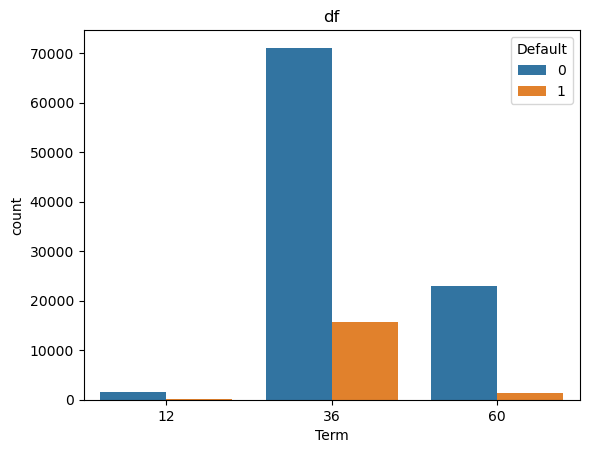

In [ ]:
# Term 
sns.countplot(data = df1, x = 'Term', hue = 'Default', color = )
plt.title("df")